# <b> Travel Insurance </b>

<i><a href= "https://drive.google.com/drive/folders/1iVx5k6tWglqfHb05o0DElg8JHg7VVG_J"> Sumber Data Travel Insurance</a></i>

### Contents and Work Flow 
- Business Problem Understanding
- Data Understanding
- Data Preperation
    1.  Data Cleaning
    2.  Correlation Check (Feature Selection)
    3.  Preprocessing: Encoding & Scaling
- Create Pipeline
- Model Benchmarking
- Pick 2 best model to **Tune**
- Pick the best model for tuning
- Save the model to **Pickle**
- Create **Interface** for user to do an instant simulation

## <b>Business Problem Understanding</b>

<i>Context</i>

Travel insurance adalah jenis asuransi yang memberikan perlindungan saat kita melakukan perjalanan, baik domestik maupun internasional. Beberapa negara, seperti di Eropa dan Amerika, bahkan mengharuskan wisatawan untuk memiliki asuransi perjalanan. Besaran premi asuransi ini bergantung pada cakupan yang diinginkan, durasi perjalanan, serta tujuan perjalanan.

Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin memprediksi pemegang polis yang akan mengajukan klaim untuk cakupan tersebut. Data pemegang polis di perusahaan asuransi ini adalah data historis yang mencakup informasi seperti destinasi, produk asuransi, dan lain sebagainya.

<i>Problem Statement</i>

Perusahaan asuransi perjalanan ingin mengembangkan model prediksi yang mampu mengidentifikasi pemegang polis yang kemungkinan besar akan mengajukan klaim asuransi berdasarkan data historis yang mencakup informasi destinasi, produk asuransi, dan faktor relevan lainnya.

<i>Goals</i>

- Meningkatkan akurasi prediksi klaim asuransi perjalanan.
- Mengoptimalkan proses penilaian risiko dan penentuan premi.
- Meminimalisir potensi kerugian finansial akibat klaim tak terduga.
- Meningkatkan kepuasan dan kepercayaan pelanggan melalui penawaran yang lebih tepat sasaran.

<i>Metric Evaluation</i>
- True Negative: Calon pelaku perjalanan tidak mengajukan Claim dan tidak berhak menerima Claim
- False Negative: Calon pelaku perjalanan tidak mengajukan Claim, namun berhak menerima Claim
- False Positive: Calon pelaku perjalanan mengajukan Claim, namun tidak berhak menerima Claim
- True Positive: Calon pelaku perjalanan mengajukan Claim dan berhak menerima Claim

Type 1 error : False Positive  
Konsekuensi: sia-sianya waktu, beban, dan kinerja perusahaan dalam pelayanan asuransi karena calon pelaku perjalanan tidak menerima Claim, meskipun sudah mengajukannya.

Type 2 error : False Negative  
Konsekuensi: penurunan kualitas pelayanan asuransi bagi pelaku perjalanan karena calon pelaku perjalanan harus menerima Claim, meskipun tidak mengajukannya.

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi beban dan kinerja perusahaan, tetapi tanpa menurunkan kualitas pelayanan asuransi bagi para pelaku perjalanan. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive.

### Import Important Library

In [1]:
# Library

import pandas as pd
import numpy as np
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_selector
import category_encoders as ce
from scipy.stats import stats, spearmanr, shapiro, mannwhitneyu, chi2_contingency

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectPercentile
from imblearn.pipeline import Pipeline as ImbPipeline 
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier 



# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

## <b>Data Understanding

| **Attribute**             | **Data Type** | **Description**                            |
|---------------------------|---------------|----------------------------------------------|
| Agency                    | Object        | Name of the travel insurance agency         |
| Agency Type               | Object        | Type of travel insurance agency             |
| Distribution Channel      | Object        | Channel of travel insurance agency          |
| Product Name              | Object        | Name of the travel insurance product        |
| Gender                    | Object        | Gender of the insured individual            |
| Duration                  | Integer       | Duration of the travel (in days)            |
| Destination               | Object        | Destination of the travel                   |
| Net Sales                 | Float         | Amount of sales of travel insurance policies |
| Commission (in value)     | Float         | Commission received for travel insurance agency |
| Age                       | Integer       | Age of the insured individual               |
| Claim                     | Object        | Claim status of the travel insurance policy |


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [3]:
df.shape

(44328, 11)

In [4]:
df.rename(columns={ 'Agency':'agency','Agency Type':'agency_type', 'Distribution Channel':'distribution_channel', 'Product Name':'product_name','Gender':'gender','Duration':'duration','Destination':'destination','Net Sales':'net_sales', 'Commision (in value)':'commision', 'Age':'age','Claim':'claim'},inplace=True)
df.head()

,agency,agency_type,distribution_channel,product_name,gender,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


### Numerik

In [5]:
df.describe()

,duration,net_sales,commision,age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


### Kategorikal

In [6]:
df.describe(exclude='number')

,agency,agency_type,distribution_channel,product_name,gender,destination,claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


## Data Cleaning

In [7]:
df['claim'] = np.where(df['claim']=='Yes', 1, 0)

In [8]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,agency,object,0,0.00,16,"[LWC, CSR]"
1,agency_type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,distribution_channel,object,0,0.00,2,"[Offline, Online]"
3,product_name,object,0,0.00,26,"[Spouse or Parents Comprehensive Plan, Single ..."
4,gender,object,31647,71.39,2,"[nan, M]"
5,duration,int64,0,0.00,437,"[413, 205]"
6,destination,object,0,0.00,138,"[NETHERLANDS, SOUTH AFRICA]"
7,net_sales,float64,0,0.00,1006,"[14.95, -22.61]"
8,commision,float64,0,0.00,915,"[4.63, 27.5]"
9,age,int64,0,0.00,89,"[39, 2]"


### Missing Values

<Axes: >

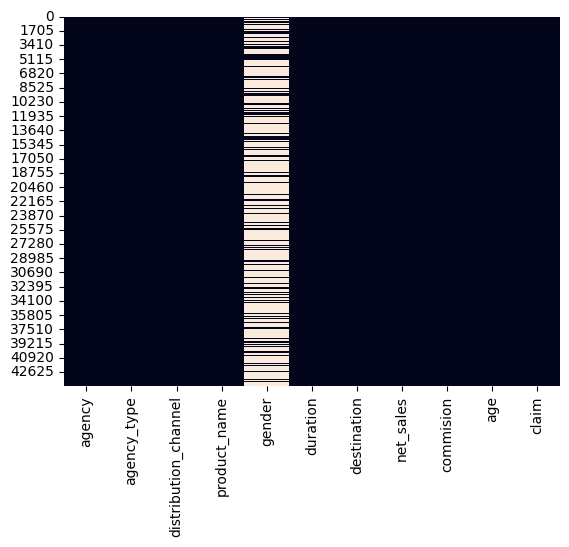

In [9]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.isna().sum()

agency                      0
agency_type                 0
distribution_channel        0
product_name                0
gender                  31647
duration                    0
destination                 0
net_sales                   0
commision                   0
age                         0
claim                       0
dtype: int64

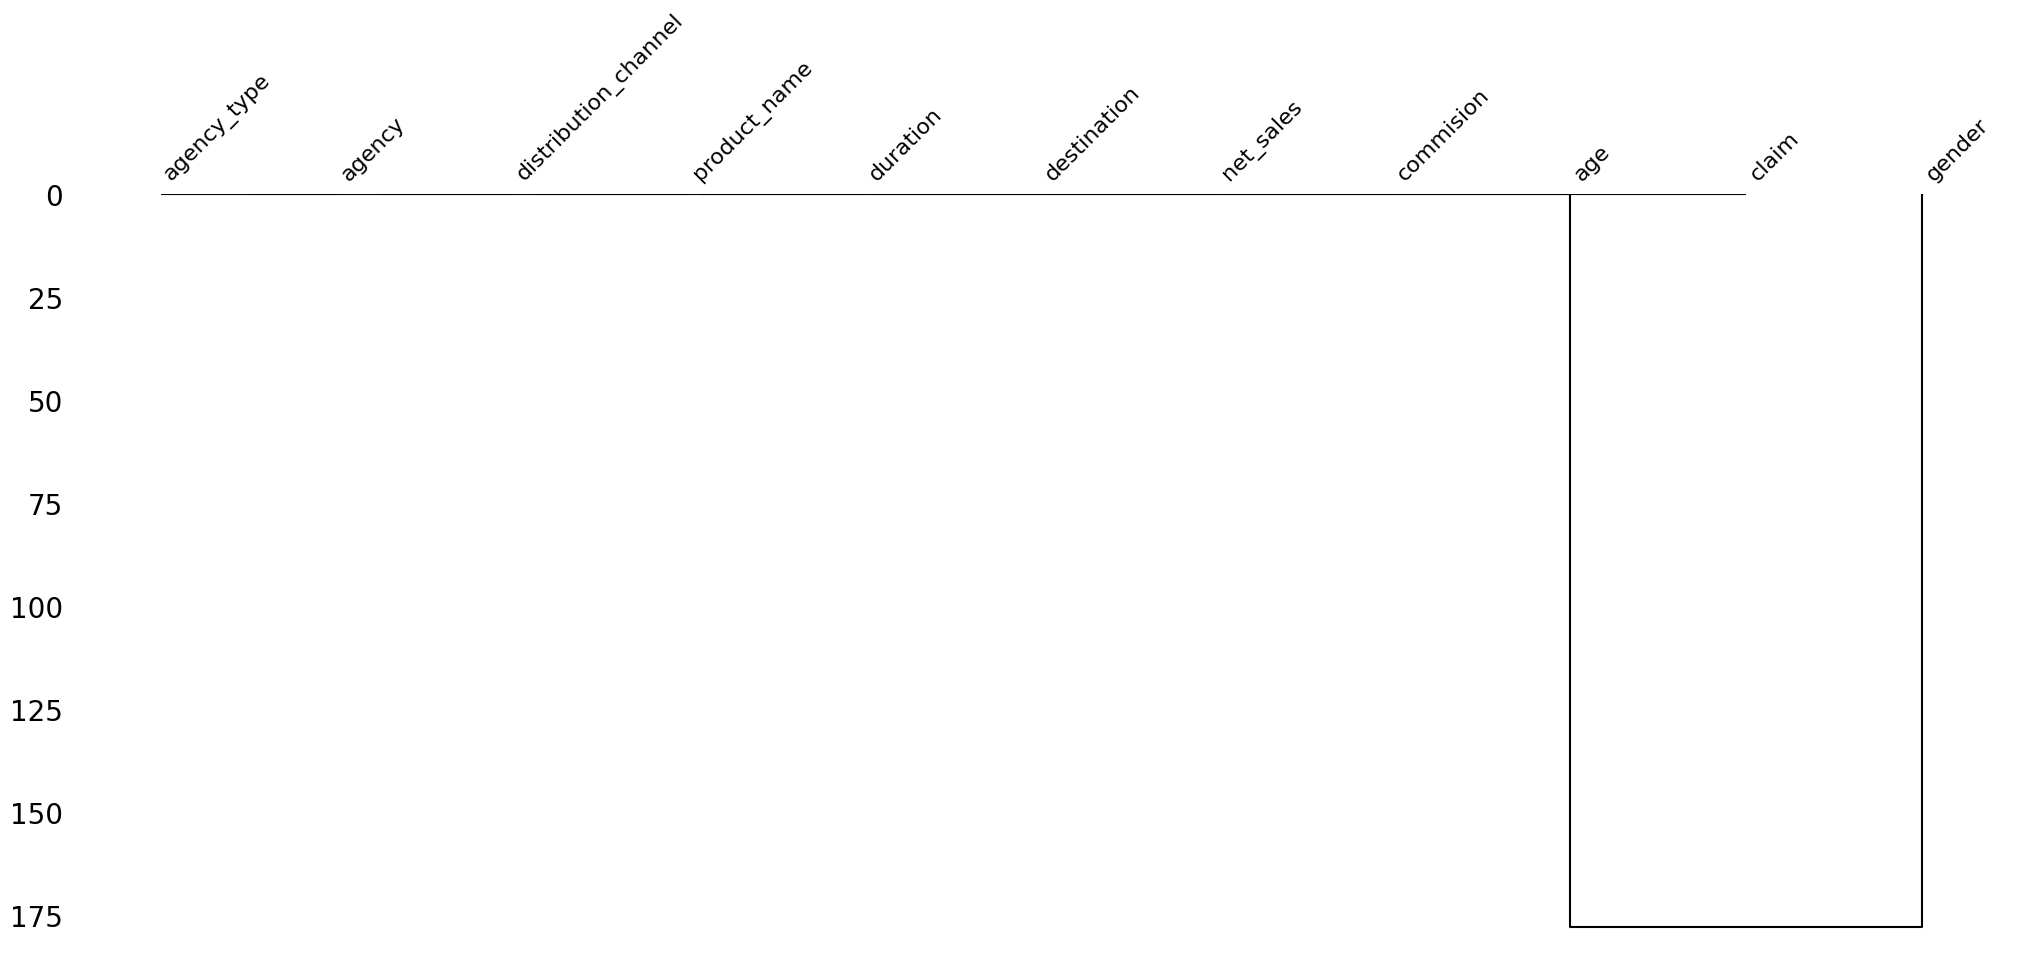

In [11]:
import missingno
import matplotlib.pyplot as plt

missingno.dendrogram(df)
plt.show()

In [12]:
pd.DataFrame({
    'age_group' : ['Child','Young Adults', 'Middle Aged Adults', 'Old Adults','Elderly'], 
    'age_range':['0-17', '18-30', '31-45', '45-55', '56 and above'],
    'missing_values':[
        df[(df['age']>=0) & (df['age']<=18)]['gender'].isna().sum(),
        df[(df['age']>17) & (df['age']<=30)]['gender'].isna().sum(),
        df[(df['age']>30) & (df['age']<=45)]['gender'].isna().sum(),
        df[(df['age']>45) & (df['age']<=55)]['gender'].isna().sum(),
        df[(df['age']>55)]['gender'].isna().sum(),
    ]
})

,age_group,age_range,missing_values
0,Child,0-17,1
1,Young Adults,18-30,3247
2,Middle Aged Adults,31-45,23447
3,Old Adults,45-55,3234
4,Elderly,56 and above,1718


In [13]:
df.drop(columns = 'gender', inplace =True)
df.head()

,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


### Data Duplicate

In [14]:
df.duplicated(keep='first').sum()

5004

In [15]:
# Menghapus data duplikat
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.head()

,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


### Outliers

In [16]:
df_model = df.copy()
print(df_model.shape)

(39324, 10)


In [17]:
df_model = df_model[df_model['duration'] < 547]
print(df_model.shape)
df_model.head()


(39309, 10)


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


In [18]:
df_model = df_model[df_model['age'] < 100]
print(df_model.shape)
df_model.head()

(38886, 10)


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


In [19]:
df_model = df_model.reset_index(drop=True)
print(df_model.shape)
df_model.head()
print(len(df))
print(len(df_model))

(38886, 10)
39324
38886


In [20]:
def outlier(df, columns_to_check, target_column):
    """
    Identify outliers in the specified numeric columns of the DataFrame and drop them, excluding the target column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check for outliers.
    columns_to_check (list): List of column names to check for outliers.
    target_column (str): The name of the target column that should be excluded from outlier detection.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    tuple: A tuple containing the lower and upper bounds, the number of outliers, and a set of outlier indices.
    """
    # Strip whitespaces from column names in the DataFrame
    df.columns = df.columns.str.strip()
    
    # Check if all columns to check exist in the DataFrame
    missing_columns = [col for col in columns_to_check if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns to check are not found in the DataFrame: {', '.join(missing_columns)}")
    
    # Check if the target column exists in the DataFrame
    if target_column not in df.columns:
        raise ValueError(f"The target column '{target_column}' is not found in the DataFrame.")
    
    # Initialize an empty list to hold indices of rows that contain outliers
    outlier_index = []
    
    # Iterate through each specified column in the DataFrame
    for column in columns_to_check:
        # Check if the column is numeric and not the target column
        if pd.api.types.is_numeric_dtype(df[column]) and column != target_column:
            # Calculate Q1, Q3, IQR, lower, and upper bounds for the current column
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            limit = iqr * 1.5
            
            lower_bound = q1 - limit
            upper_bound = q3 + limit
            
            # Identify outliers in the current column
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            
            # Add outlier indices to the list
            outlier_index.extend(outliers.index)
            
            # Count the number of outliers in the current column
            num_outliers = len(outliers)
            
            # Print outlier information for the current column
            print(f'=====Outliers in {column}=====')
            print(f'IQR: {iqr}')
            print(f'Lower limit: {lower_bound}')
            print(f'Upper limit: {upper_bound}')
            print(f'Total number of outliers in column "{column}": {num_outliers}')
        else:
            print(f'Column "{column}" is not numeric or is the target column. Skipping outlier detection.')
    
    # Drop rows containing outliers
    df_cleaned = df.drop(outlier_index)
    
    # Return the DataFrame with outliers removed, lower bound, upper bound, and the set of outlier indices
    return df_cleaned, lower_bound, upper_bound, num_outliers, outlier_index

# Example usage:
df_model, lower_bound, upper_bound, num_outliers, outlier_indices = outlier(df, df.columns, 'claim')


Column "agency" is not numeric or is the target column. Skipping outlier detection.
Column "agency_type" is not numeric or is the target column. Skipping outlier detection.
Column "distribution_channel" is not numeric or is the target column. Skipping outlier detection.
Column "product_name" is not numeric or is the target column. Skipping outlier detection.
=====Outliers in duration=====
IQR: 46.0
Lower limit: -58.0
Upper limit: 126.0
Total number of outliers in column "duration": 3444
Column "destination" is not numeric or is the target column. Skipping outlier detection.
=====Outliers in net_sales=====
IQR: 31.0
Lower limit: -27.5
Upper limit: 96.5
Total number of outliers in column "net_sales": 3543
=====Outliers in commision=====
IQR: 11.88
Lower limit: -17.82
Upper limit: 29.700000000000003
Total number of outliers in column "commision": 4028
=====Outliers in age=====
IQR: 9.0
Lower limit: 21.5
Upper limit: 57.5
Total number of outliers in column "age": 3741
Column "claim" is not

In [21]:
print(len(df_model))
df_model 

29205


,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0
5,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.0,36,0
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,25,"KOREA, REPUBLIC OF",50.0,0.0,36,0
...,...,...,...,...,...,...,...,...,...,...
39317,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,VIET NAM,34.0,0.0,36,0
39318,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,THAILAND,40.0,0.0,36,0
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.0,36,1
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.5,50,0


In [22]:
df_model.isnull().sum()

agency                  0
agency_type             0
distribution_channel    0
product_name            0
duration                0
destination             0
net_sales               0
commision               0
age                     0
claim                   0
dtype: int64

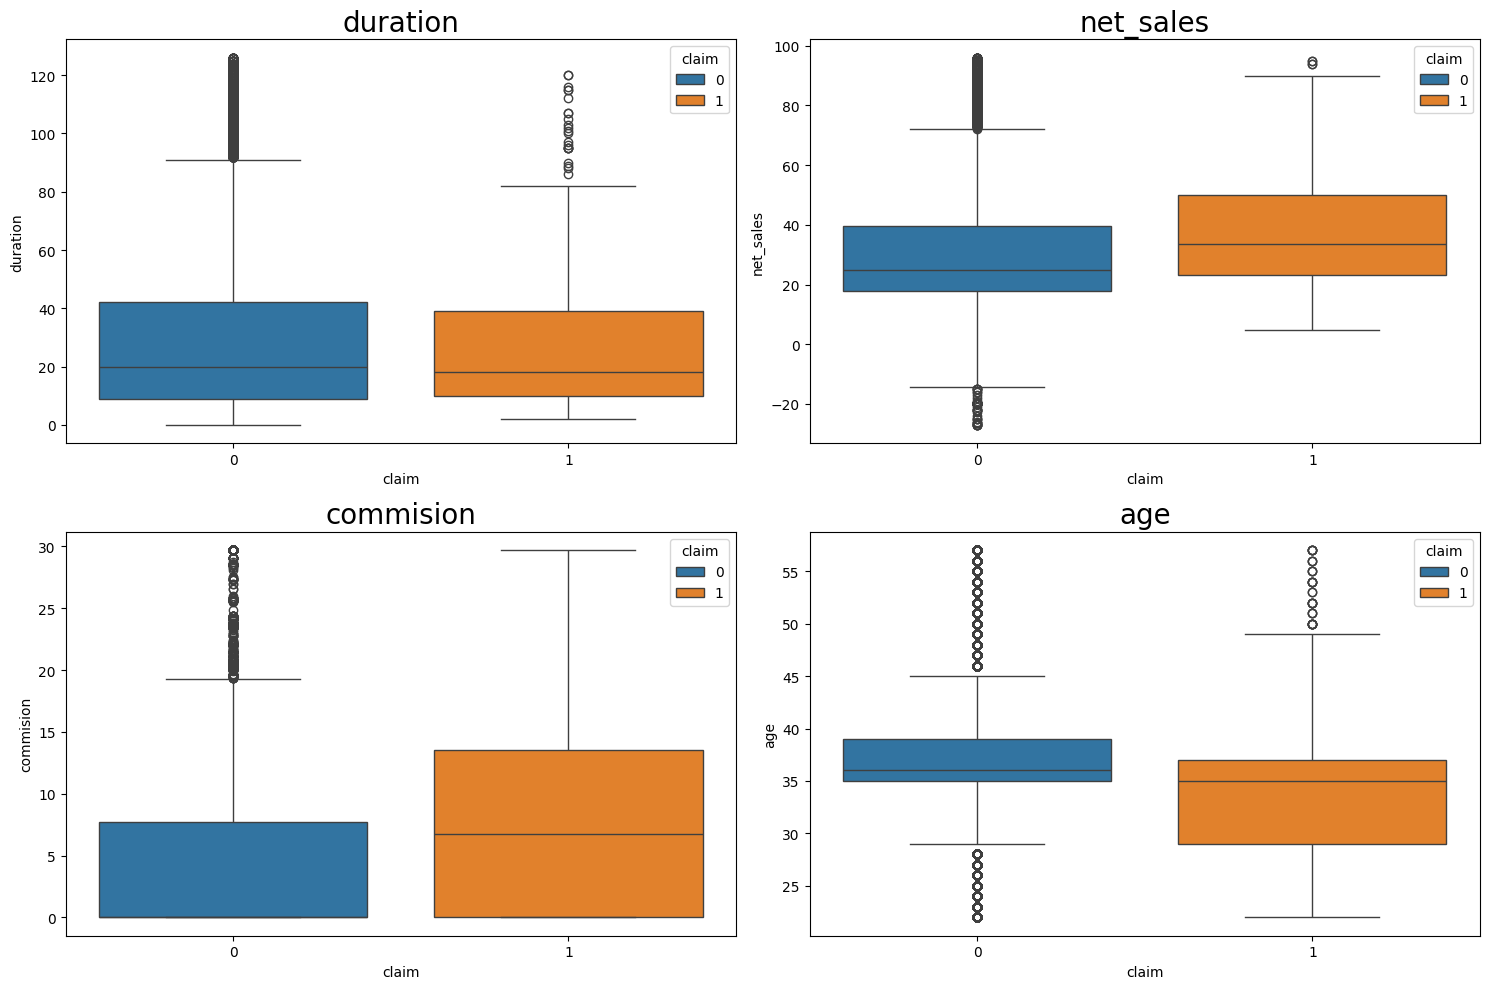

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plotnumber = 1
num_feature = df_model.select_dtypes(include = 'number').drop(columns='claim').columns

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(data=df_model, y=feature, x='claim',hue = 'claim')
    plt.title(feature, fontsize = 20)
    plotnumber +=1
    plt.tight_layout()

## Exploratory Data Analysis

### Numerical

In [24]:
df_model['claim'].value_counts()

claim
0    28814
1      391
Name: count, dtype: int64

<Axes: xlabel='claim', ylabel='count'>

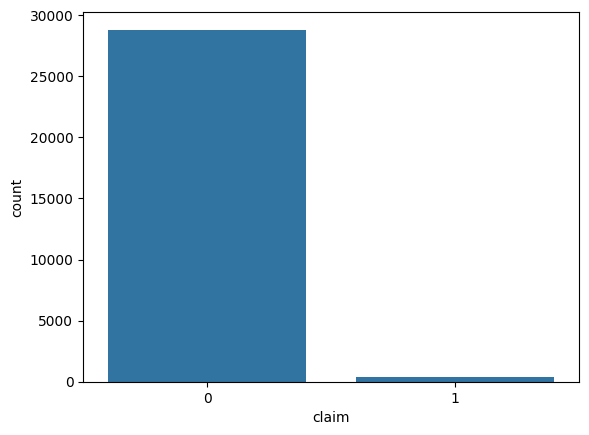

In [25]:
sns.countplot(data=df_model, x = 'claim')

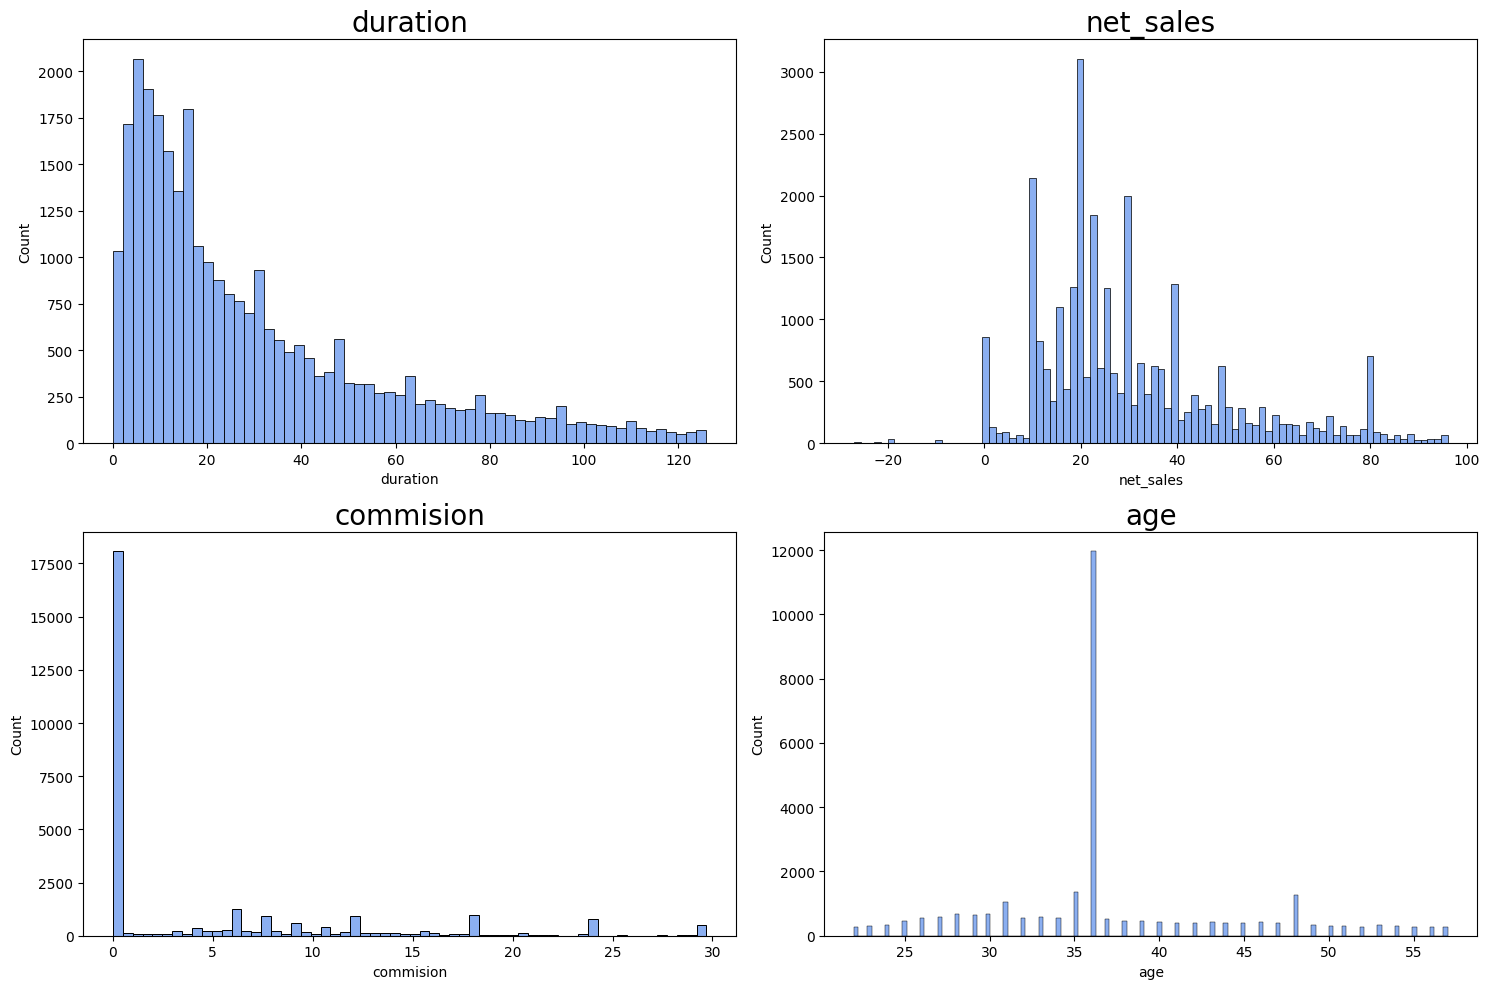

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plotnumber = 1
num_feature = df_model.select_dtypes(include = 'number').drop(columns='claim').columns

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(data=df_model, x=feature, color='cornflowerblue')
    plt.title(feature, fontsize = 20)
    plotnumber +=1
    plt.tight_layout()

In [27]:
df_model['duration'].value_counts().head(10)

duration
6     1046
5     1021
7      959
8      944
4      907
10     883
9      881
11     828
3      809
12     743
Name: count, dtype: int64

In [28]:
df_model['net_sales'].value_counts().head(10)

net_sales
20.0    2576
10.0    1894
22.0    1266
18.0     885
26.0     840
0.0      785
29.7     761
80.0     684
30.0     664
39.6     634
Name: count, dtype: int64

In [29]:
df_model['commision'].value_counts().head(10)

commision
0.00     17916
17.82      866
7.70       866
23.76      723
11.88      601
6.30       596
29.70      520
9.10       485
10.50      350
12.25      308
Name: count, dtype: int64

In [30]:
df_model['age'].value_counts().head(10)

age
36    11970
35     1355
48     1268
31     1061
28      691
30      685
29      652
27      595
33      582
32      554
Name: count, dtype: int64

### Kategorik

In [31]:
df.describe(include='O')

,agency,agency_type,distribution_channel,product_name,destination
count,39324,39324,39324,39324,39324
unique,16,2,2,26,138
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,20990,28096,38613,11009,8106


<Figure size 2500x1500 with 0 Axes>

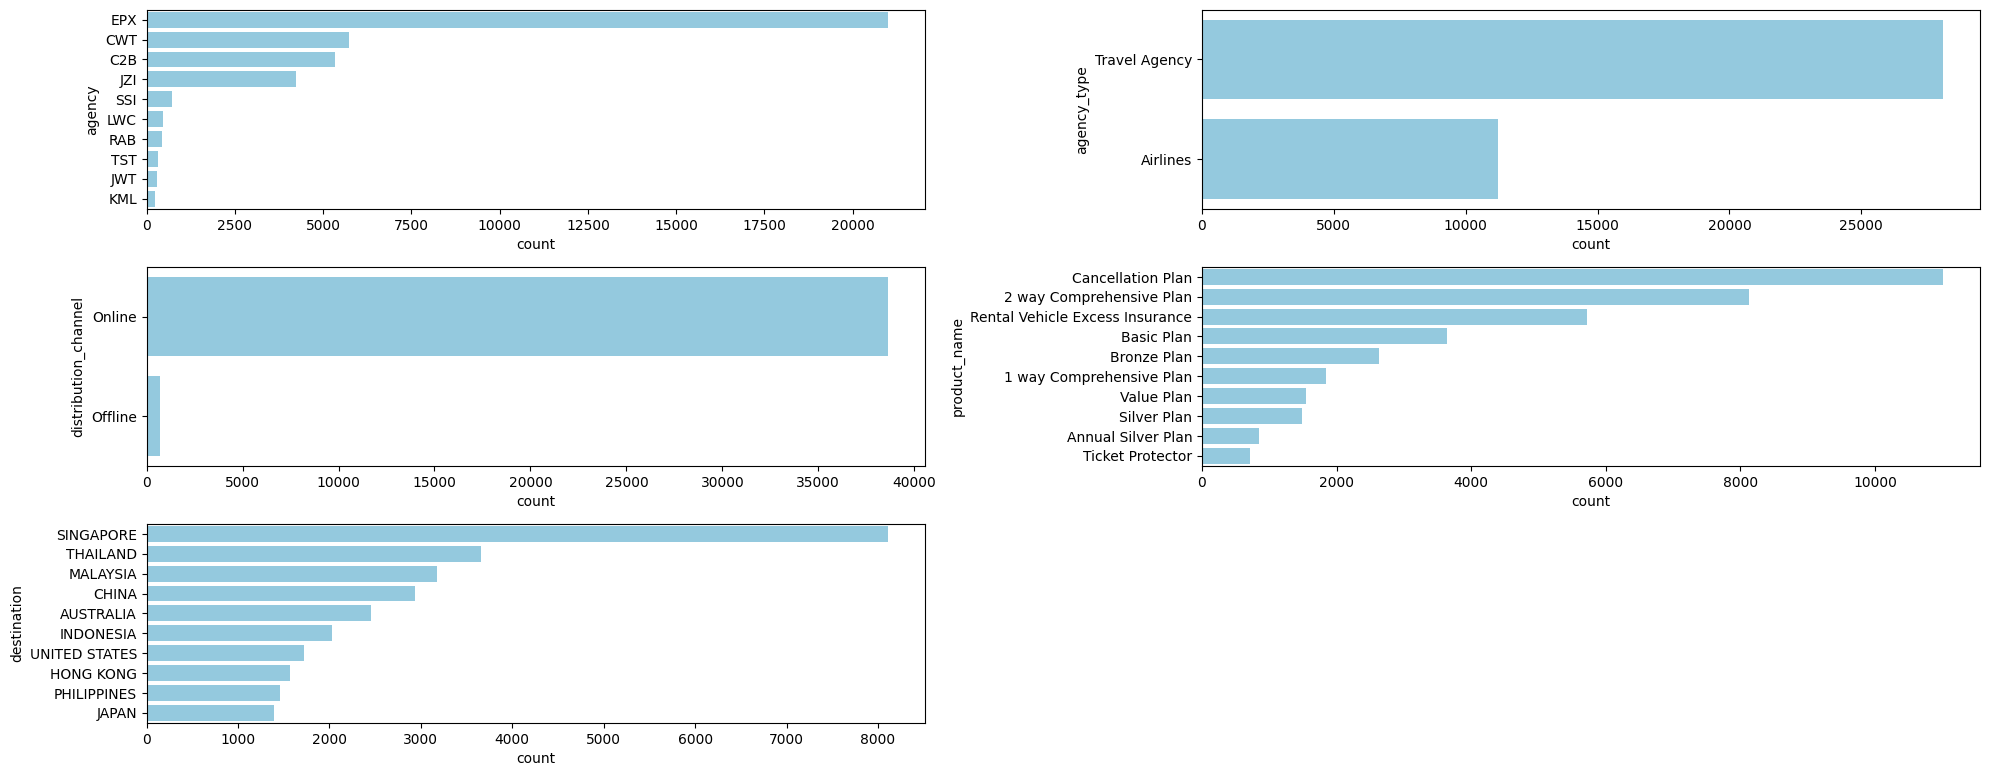

In [32]:
plt.figure(figsize=(25,15))
count = 0
fig = plt.figure(figsize=(20,10))
for kolom in df.select_dtypes(exclude='number').columns:
    count += 1
    plt.subplot(4,2,count)
    sns.countplot(y = kolom, data = df.select_dtypes(exclude='number'), order = df.select_dtypes(exclude='number')[kolom].value_counts().sort_values(ascending = False).head(10).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

### Peta Destinasi

In [33]:
shape = pd.read_csv('world-administrative-boundaries.csv',delimiter=';')
shape.sort_values(by = 'English Name').head()

,Geo Point,Geo Shape,ISO 3 territory code,Status,ISO 3 country code,English Name,Continent of the territory,Region of the territory,ISO 3166-1 Alpha 2-Codes,French Name
112,"9.767584545477694, 28.39877462510127","{""coordinates"": [[[28.04212659400003, 9.343691...",NaN,NaN,NaN,Abyei,Africa,Northern Africa,NaN,Abyei
215,"33.838805716206636, 66.0264706677288","{""coordinates"": [[[74.91574000000008, 37.23733...",AFG,Member State,AFG,Afghanistan,Asia,Southern Asia,AF,Afghanistan
135,"35.03382308522889, 79.12704701021674","{""coordinates"": [[[78.94845000000004, 33.37895...",NaN,Sovereignty unsettled JammuK-China,XXY,Aksai Chin,Asia,Eastern Asia,NaN,Aksai Chin
254,"41.142284823416894, 20.068384605918776","{""coordinates"": [[[20.071420000000046, 42.5609...",ALB,Member State,ALB,Albania,Europe,Southern Europe,AL,Albanie
23,"28.163239267304466, 2.6323881691928235","{""coordinates"": [[[8.622030000000052, 36.94137...",DZA,Member State,DZA,Algeria,Africa,Northern Africa,DZ,Algérie


In [34]:
shape['English Name'].sort_values().unique()

array(['Abyei', 'Afghanistan', 'Aksai Chin', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Arunachal Pradesh', 'Australia', 'Austria', 'Azerbaijan',
       'Azores Islands', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia & Herzegovina', 'Botswana', 'Bouvet Island',
       'Brazil', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democra

In [35]:
replacement_dict = {
    'United States of America': 'United States',
    'U.K. of Great Britain and Northern Ireland': 'United Kingdom'
}

# Replace the values in the 'English Name' column according to the dictionary
shape['English Name'] = shape['English Name'].replace(replacement_dict)
shape['English Name'] = shape['English Name'].str.upper()

In [36]:
destination = pd.DataFrame(df['destination'].value_counts().sort_values(ascending=False)).reset_index().rename(columns={'destination':'country'})
destination.head(10)

,country,count
0,SINGAPORE,8106
1,THAILAND,3659
2,MALAYSIA,3173
3,CHINA,2931
4,AUSTRALIA,2453
5,INDONESIA,2029
6,UNITED STATES,1723
7,HONG KONG,1570
8,PHILIPPINES,1461
9,JAPAN,1395


In [37]:
destination['country'].sort_values().unique()

array(['ANGOLA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA', 'AUSTRIA',
       'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH', 'BELARUS', 'BELGIUM',
       'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA', 'BOTSWANA', 'BRAZIL',
       'BRUNEI DARUSSALAM', 'BULGARIA', 'CAMBODIA', 'CAMEROON', 'CANADA',
       'CAYMAN ISLANDS', 'CHILE', 'CHINA', 'COLOMBIA', 'COSTA RICA',
       'CROATIA', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'ESTONIA', 'ETHIOPIA',
       'FAROE ISLANDS', 'FIJI', 'FINLAND', 'FRANCE', 'FRENCH POLYNESIA',
       'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GUADELOUPE', 'GUAM',
       'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HONG KONG', 'HUNGARY',
       'ICELAND', 'INDIA', 'INDONESIA', 'IRAN, ISLAMIC REPUBLIC OF',
       'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN',
       'KAZAKHSTAN', 'KENYA', "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
       'KOREA, REPUBLIC OF', 'KUWAIT', 'KYRGYZSTAN',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'LATVIA', 

In [38]:
map = pd.merge(
    left = shape,
    right = destination,
    left_on = 'English Name',
    right_on = 'country',
    how = 'right'
)

map

,Geo Point,Geo Shape,ISO 3 territory code,Status,ISO 3 country code,English Name,Continent of the territory,Region of the territory,ISO 3166-1 Alpha 2-Codes,French Name,country,count
0,"1.3516148228449165, 103.8080509453779","{""coordinates"": [[[103.95997000000006, 1.32083...",SGP,Member State,SGP,SINGAPORE,Asia,South-Eastern Asia,SG,Singapour,SINGAPORE,8106
1,"15.127035821032173, 101.0173609470801","{""coordinates"": [[[[99.66804000000008, 6.49639...",THA,Member State,THA,THAILAND,Asia,South-Eastern Asia,TH,Thaïlande,THAILAND,3659
2,"3.7923669015472297, 109.7081944595275","{""coordinates"": [[[[111.41152000000005, 2.3763...",MYS,Member State,MYS,MALAYSIA,Asia,South-Eastern Asia,MY,Malaisie,MALAYSIA,3173
3,"36.56790870229093, 103.9040560317203","{""coordinates"": [[[[110.71583000000004, 20.068...",CHN,Member State,CHN,CHINA,Asia,Eastern Asia,CN,Chine,CHINA,2931
4,"-25.734968241934748, 134.48956247309874","{""coordinates"": [[[[158.8821700000001, -54.711...",AUS,Member State,AUS,AUSTRALIA,Oceania,Australia and New Zealand,AU,Australie,AUSTRALIA,2453
...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIBET,1
134,"5.685952200319196, 12.74359416002904","{""coordinates"": [[[15.499010000000055, 7.52661...",CMR,Member State,CMR,CAMEROON,Africa,Middle Africa,CM,Cameroun,CAMEROON,1
135,"14.366965745226873, -14.467653621117616","{""coordinates"": [[[-12.244829999999922, 14.764...",SEN,Member State,SEN,SENEGAL,Africa,Western Africa,SN,Sénégal,SENEGAL,1
136,"38.52817773320961, 71.04200446155443","{""coordinates"": [[[70.98204000000004, 40.24484...",TJK,Member State,TJK,TAJIKISTAN,Asia,Central Asia,TJ,Tadjikistan,TAJIKISTAN,1


In [39]:
map.dropna(inplace=True)

In [40]:
map.shape

(128, 12)

In [41]:
import plotly.express as px

import plotly.express as px

# Create a choropleth map with customizations
fig = px.choropleth(
    map,
    locations='ISO 3 territory code',
    locationmode='ISO-3',  # Specify ISO 3 letter codes
    color='count',
    color_continuous_scale='YlGnBu',  # Choose a color scale you prefer
    title='World Map with Data Using ISO Country Codes', 
    labels={'country': 'Value'},  # Customize the label of the colorbar
    hover_name='English Name'
)

# Customize the layout for a more visually pleasing look
fig.update_layout(
    geo=dict(
        showframe=True,  # Show frame around the map
        showcoastlines=True,  # Show coastlines
        projection_type='natural earth'  # Use a natural earth projection
    ),
    coloraxis_colorbar=dict(
        title='Sum',  # Set the title for the colorbar
        thicknessmode='fraction',
        thickness=0.03,
        lenmode='fraction',
        len=0.75,
        xanchor='left',
        x=0.98
    ),
    font=dict(
        size=12,  # Font size for better readability
        family='Arial'
    ),
    width=1000,  # Adjust the width of the map
    height=600,  # Adjust the height of the map
    title_font_size=18  # Set the title font size
)

# Show the map
fig.show()


## **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:

- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

Berdasarkan hasil coding di atas terlihat adanya nan value. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

Hanya terdapat 1 fitur yang memiliki missing value. Fitur 'gender' memilki missing value sebanyak 31.647, atau 71.39% dari total data.

**Drop Columns**

#### Data Correlation

In [42]:
df_model.select_dtypes(include='number').corr()

,duration,net_sales,commision,age,claim
duration,1.000000,0.120104,-0.036395,-0.038254,-0.005610
net_sales,0.120104,1.000000,0.162788,-0.049375,0.050612
commision,-0.036395,0.162788,1.000000,0.096266,0.062577
age,-0.038254,-0.049375,0.096266,1.000000,-0.032658
claim,-0.005610,0.050612,0.062577,-0.032658,1.000000


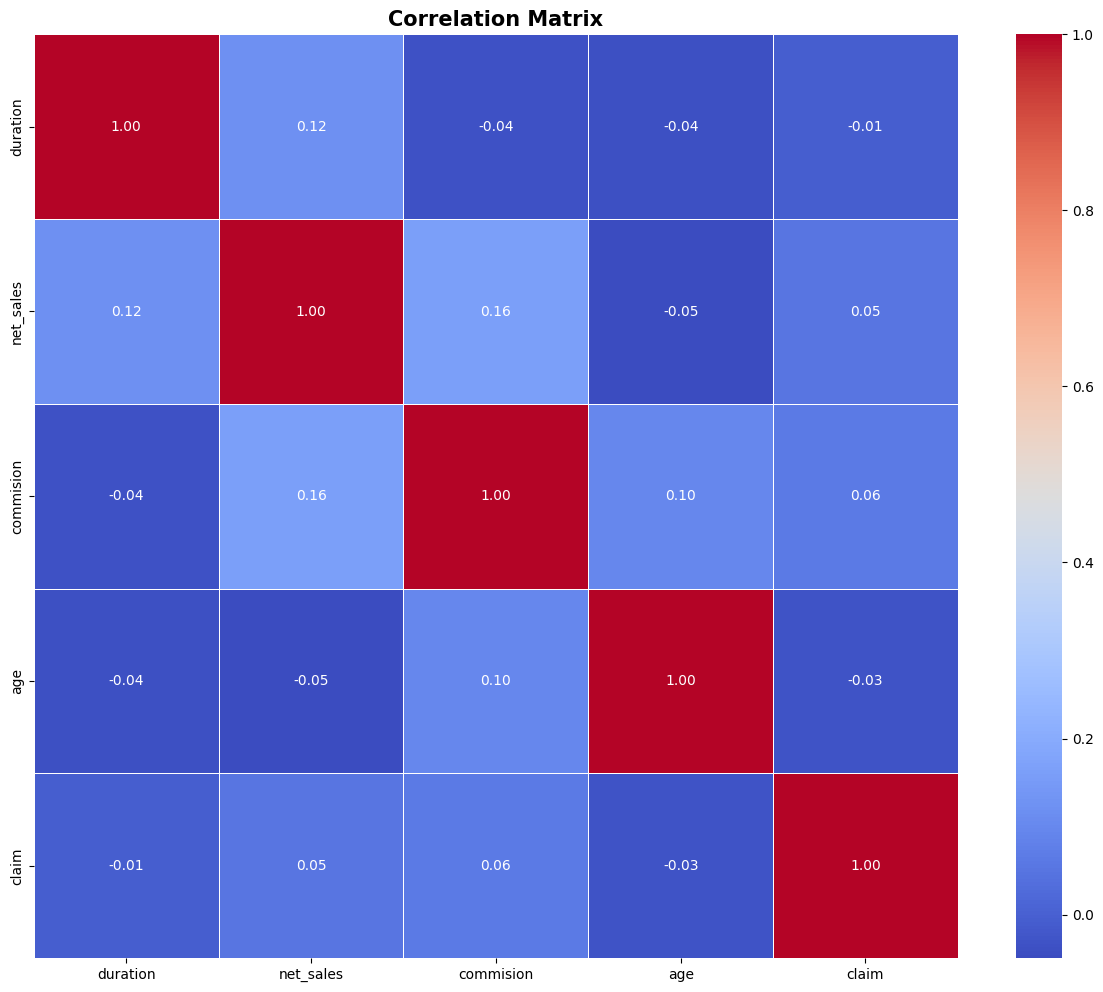

In [43]:
plt.figure(figsize = (15,12))
corr = df_model.select_dtypes(include='number').corr()
sns.heatmap(df_model.select_dtypes(include='number').corr(),annot=True,fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

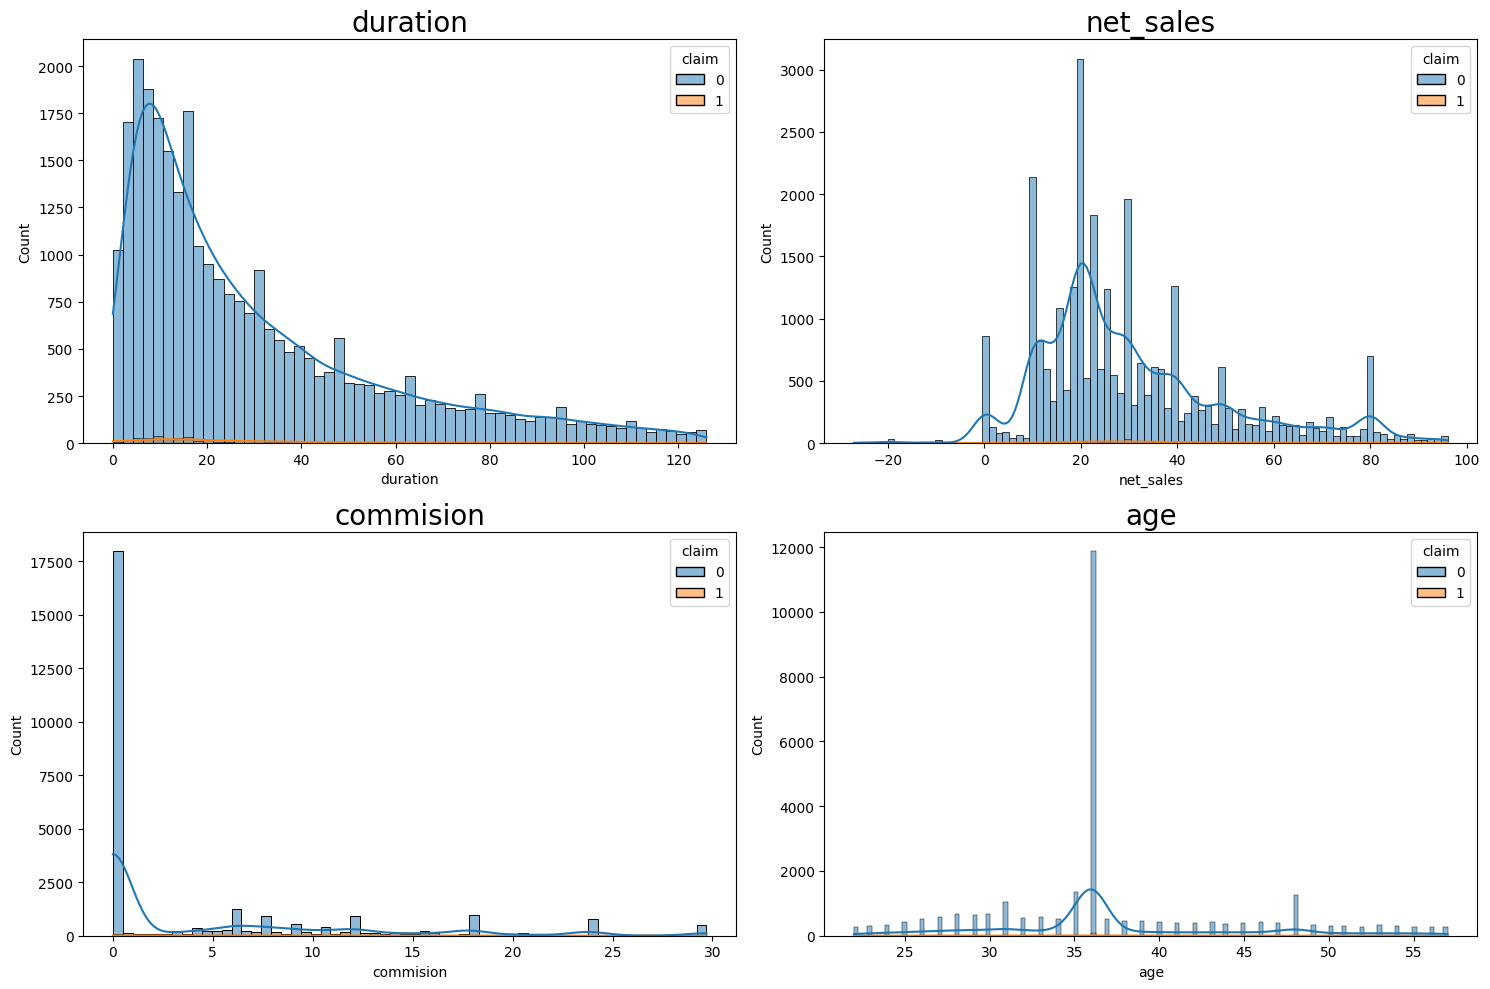

In [44]:
plt.figure(figsize=(15,10))
plotnumber = 1
num_feature = df_model.select_dtypes(include = 'number').drop(columns = 'claim').columns

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(data=df_model, x=feature, color='cornflowerblue',kde=True, hue = 'claim')
    plt.title(feature, fontsize = 20)
    plotnumber +=1
    plt.tight_layout()

#### Data Imbalance

In [45]:
(df['claim'].value_counts()/len(df))*100

claim
0    98.288577
1     1.711423
Name: count, dtype: float64

## Data Preparation

In [46]:
df['claim'].value_counts()

claim
0    38651
1      673
Name: count, dtype: int64

In [47]:
df_model.head()

,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,age,claim
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0
5,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.0,36,0
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,25,"KOREA, REPUBLIC OF",50.0,0.0,36,0


### Normality Test

#### Claim

In [48]:
shapiro_test = shapiro(df_model['claim'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.08925105675625367 p-value: 1.678132311803007e-144
Tidak berdistribusi normal (reject H0)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29205.



#### Duration

In [49]:
shapiro_test = shapiro(df_model['duration'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.8458008558952831 p-value: 2.008489193085314e-95
Tidak berdistribusi normal (reject H0)


#### age

In [50]:
shapiro_test = shapiro(df_model['age'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.9063302591526994 p-value: 1.6800282524876574e-83
Tidak berdistribusi normal (reject H0)


### Correlation Test

#### numerik

claim        1.000000
commision    0.062577
net_sales    0.050612
duration    -0.005610
age         -0.032658
Name: claim, dtype: float64


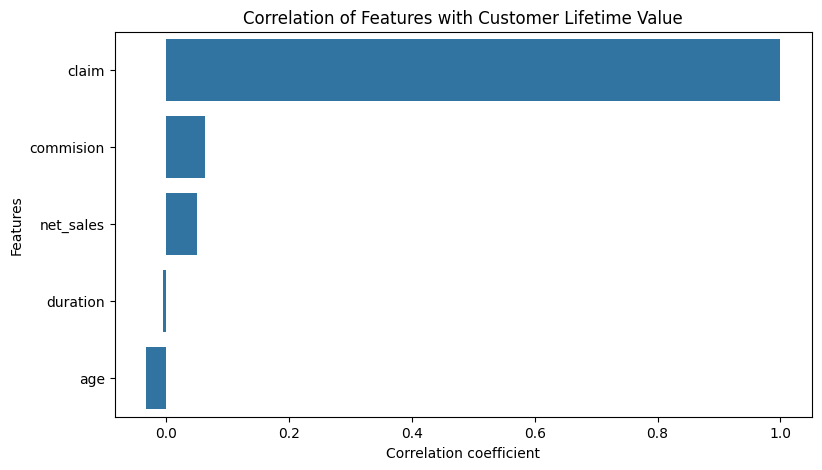

In [51]:
numcorr = corr['claim'].sort_values(ascending=False)
print(numcorr)

plt.figure(figsize=(9,5))
sns.barplot(x=numcorr.values,y=numcorr.index)
plt.title('Correlation of Features with Customer Lifetime Value')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

In [52]:
for col in numcorr.index:
    corr, p_value = spearmanr(df[col], df['claim'])
    significance = 'significant' if p_value < 0.05 else 'not significant'
    print(f"{col} vs claim:\nCorrelation: {corr:.4f} | P-value: {p_value:.4g} ({significance})\n")

claim vs claim:
Correlation: 1.0000 | P-value: 0 (significant)

commision vs claim:
Correlation: 0.0988 | P-value: 8.433e-86 (significant)

net_sales vs claim:
Correlation: 0.0911 | P-value: 2.976e-73 (significant)

duration vs claim:
Correlation: 0.0419 | P-value: 8.929e-17 (significant)

age vs claim:
Correlation: -0.0269 | P-value: 9.165e-08 (significant)



##### Numeric Corelation Result
Results = all of the features can be used because of significant with the data

#### kategorik

In [53]:
df_model.select_dtypes(exclude='number').columns

Index(['agency', 'agency_type', 'distribution_channel', 'product_name',
       'destination'],
      dtype='object')

In [54]:
table_agency = pd.crosstab(df_model['agency'], df_model['claim'])

chi2_agency, p_agency, dof_agency, expected_agency = chi2_contingency(table_agency)
print(f"Chi-squared Test for agency and claim:")
print(f"Chi-squared Statistic: {chi2_agency}, p-value: {p_agency}")

Chi-squared Test for agency and claim:
Chi-squared Statistic: 850.2043011487563, p-value: 2.418898030258259e-173


In [55]:
table_agency_type = pd.crosstab(df_model['agency_type'], df_model['claim'])

chi2_agency_type, p_agency_type, dof_agency_type, expected_agency_type = chi2_contingency(table_agency_type)
print(f"Chi-squared Test for agency type and claim:")
print(f"Chi-squared Statistic: {chi2_agency_type}, p-value: {p_agency_type}")

Chi-squared Test for agency type and claim:
Chi-squared Statistic: 278.13389690679014, p-value: 1.9153895196867715e-62


In [56]:
table_distribution_channel = pd.crosstab(df_model['distribution_channel'], df_model['claim'])

chi2_distribution_channel, p_distribution_channel, dof_distribution_channel, expected_distribution_channel = chi2_contingency(table_distribution_channel)
print(f"Chi-squared Test for distribution channel and claim:")
print(f"Chi-squared Statistic: {chi2_distribution_channel}, p-value: {p_distribution_channel}")

Chi-squared Test for distribution channel and claim:
Chi-squared Statistic: 0.0001070581521075199, p-value: 0.9917445227702605


In [57]:
table_product_name = pd.crosstab(df_model['product_name'], df_model['claim'])

chi2_product_name, p_product_name, dof_product_name, expected_product_name = chi2_contingency(table_product_name)
print(f"Chi-squared Test for product name and claim:")
print(f"Chi-squared Statistic: {chi2_product_name}, p-value: {p_product_name}")

Chi-squared Test for product name and claim:
Chi-squared Statistic: 910.9732857655996, p-value: 9.621263460909951e-183


In [58]:
table_destination = pd.crosstab(df_model['destination'], df_model['claim'])

chi2_destination, p_destination, dof_destination, expected_destination = chi2_contingency(table_destination)
print(f"Chi-squared Test for destination and claim:")
print(f"Chi-squared Statistic: {chi2_destination}, p-value: {p_destination}")

Chi-squared Test for destination and claim:
Chi-squared Statistic: 437.14428695847556, p-value: 5.971843159506813e-36


##### Categorical Correlation Test
Based on the Chi-squared test results, the variable "destination" does not exhibit a statistically significant association with the 'claim' variable in the dataset (p-value > 0.05). All other variables exhibit statistically significant associations (p-value < 0.05). Consequently, as a feature engineering method, the "destination" column should be dropped due to its lack of statistical relevance.

In [59]:
df_model.drop(columns = 'distribution_channel', inplace=True)

In [60]:
df_model.dtypes

agency           object
agency_type      object
product_name     object
duration          int64
destination      object
net_sales       float64
commision       float64
age               int64
claim             int32
dtype: object

### Column Transformer

In [65]:
transformer = ColumnTransformer([
    ('binary', ce.BinaryEncoder(), ['agency','product_name','destination']),
    ('onehot', OneHotEncoder(drop='first'), ['agency_type']),
    ('rob', RobustScaler(), ['duration', 'net_sales', 'commision', 'age'])
], remainder='passthrough')

transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['agency', 'product_name', 'destination']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['agency_type']),
                                ('rob', RobustScaler(),
                                 ['duration', 'net_sales', 'commision',
                                  'age'])])

| Attribute                 | Data Type           | Encoder         |Scaler     |
|---------------------------|---------------------|-----------------|-----------|
|agency                     |str	              |Binary           |           |
|agency_type                |str                  |OHE              |           |
|distribution_channel       |str	              |OHE              |     |
|product_name               |str	              |Binary           |     |
|duration   	            |int64	              |                 |Robust     |
|net_sales  	            |float64              |              |Robust           |
|commision      	        |float64              |           |Robust           |
|age                    	|int32	              |                 |Robust     |

In [ ]:
transformer.transformers_[0][1].get_feature_names_out()

array(['agency_0', 'agency_1', 'agency_2', 'agency_3', 'product_name_0',
       'product_name_1', 'product_name_2', 'product_name_3',
       'product_name_4'], dtype=object)

In [ ]:
transformer.transformers_[1][1].get_feature_names_out()

array(['agency_type_Travel Agency', 'distribution_channel_Online'],
      dtype=object)

In [ ]:
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + ['duration', 'net_sales', 'commision', 'age','claim']
feature_names

['agency_0',
 'agency_1',
 'agency_2',
 'agency_3',
 'product_name_0',
 'product_name_1',
 'product_name_2',
 'product_name_3',
 'product_name_4',
 'agency_type_Travel Agency',
 'distribution_channel_Online',
 'duration',
 'net_sales',
 'commision',
 'age',
 'claim']

In [ ]:
df_encoded.columns = feature_names
df_encoded

,agency_0,agency_1,agency_2,agency_3,product_name_0,product_name_1,product_name_2,product_name_3,product_name_4,agency_type_Travel Agency,distribution_channel_Online,duration,net_sales,commision,age,claim
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.391304,6.131148,4.545455,2.1,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.456522,-0.622951,0.000000,-0.3,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.130435,-0.229508,0.648148,-1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.108696,2.721311,0.000000,2.3,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.369565,-0.426230,0.336700,-0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38881,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.239130,0.032787,0.000000,0.0,1.0
38882,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.173913,1.645902,4.000000,1.1,0.0
38883,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.847826,0.032787,0.883838,1.4,0.0
38884,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.565217,0.229508,0.000000,0.0,0.0


## Resampling Benchamarking

In [66]:
X = df_model.drop(columns = 'claim')
y = df_model['claim']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,  
    random_state = 2024
)

In [67]:
resampling_methods = {
    'RandomUnderSampler': RandomUnderSampler(random_state=2024),
    'RandomOverSampler': RandomOverSampler(random_state=2024),
    'SMOTE': SMOTE(random_state=2024),
    'NearMiss': NearMiss(),
}

results = {}

for name, method in resampling_methods.items():
    pipeline = ImbPipeline([
        ('preprocessing', transformer),
        ('Resampling', method),
        ('RandomForest', RandomForestClassifier())
    ])
    
    # Fitting
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, pred, average='binary', pos_label=1)  
    results[name] = f1

for resampling_method, f1 in results.items():
    print(f'{resampling_method}: {f1:.4f}')

RandomUnderSampler: 0.0826
RandomOverSampler: 0.0645
SMOTE: 0.0948
NearMiss: 0.0243


### Machine Learning Modelling and Evaluation Metrics 

In [68]:
logreg = LogisticRegression(random_state=2023)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

smote = SMOTE()
scaler = RobustScaler()

logreg_penalized = LogisticRegression(class_weight = 'balanced', random_state=2023)

In [ ]:
X = df_encoded.drop(columns = 'claim')
y = df_encoded['claim']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,  
    random_state = 2024
)

##### Percentile

In [78]:
#Using Percentile
percentile = SelectPercentile(percentile= 50)
percentile.fit(X_train, y_train)

df_enconded = transformer.fit(X_train, y_train)

X_train_percentile = percentile.transform(X_train)
X_test_percentile = percentile.transform(X_test)

ValueError: could not convert string to float: 'C2B'

#### Without Balancing/Resampling

In [70]:
models = [logreg, knn, tree]


In [ ]:

rocauc_mean_withoutsampling = []
rocauc_std_withoutsampling = []
rocauc_train_withoutsampling = []
rocauc_test_withoutsampling = []

for model in models:
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_nosampling

    modeling = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train, y_train)
    y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(X_test)

    rocauc_mean_withoutsampling.append(modeling.mean())
    rocauc_std_withoutsampling.append(modeling.std())
    rocauc_train_withoutsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withoutsampling.append(roc_auc_score(y_test, y_pred_test))

results1 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withoutsampling,
    'Std': rocauc_std_withoutsampling,
    'Train Set': rocauc_train_withoutsampling,
    'Test Set': rocauc_test_withoutsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results1

#### With Balancing/Resampling

In [ ]:
models = [logreg, knn, tree]

rocauc_mean_withoutsampling = []
rocauc_std_withoutsampling = []
rocauc_train_withoutsampling = []
rocauc_test_withoutsampling = []

for model in models:
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_nosampling

    modeling = cross_val_score(
        estimator,
        X_train_percentile,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train_percentile, y_train)
    y_pred_train = estimator.predict(X_train_percentile)
    y_pred_test = estimator.predict(X_test_percentile)

    rocauc_mean_withoutsampling.append(modeling.mean())
    rocauc_std_withoutsampling.append(modeling.std())
    rocauc_train_withoutsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withoutsampling.append(roc_auc_score(y_test, y_pred_test))

results2 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withoutsampling,
    'Std': rocauc_std_withoutsampling,
    'Train Set': rocauc_train_withoutsampling,
    'Test Set': rocauc_test_withoutsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results2

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.823368,0.015780,0.499967,0.500000
KNN,0.623391,0.013727,0.518775,0.507677
Decision Tree,0.582381,0.015228,0.708142,0.525008


##### With Balancing/Resampling: Percentile and Smote

In [71]:
rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

for model in models:
    pipe_model_withsampling = Pipeline([
        ('preprocessing',transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_withsampling

    modeling = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train, y_train)
    y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(X_test)

    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

results3 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results3

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.787937,0.040127,0.736274,0.782393
KNN,0.627333,0.027592,0.966493,0.631769
Decision Tree,0.527344,0.016160,0.943366,0.559019


##### With Balancing: Percentile and NearMiss()

In [ ]:
nearmiss = NearMiss(version=1)

rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

for model in models:
    pipe_model_withsampling = Pipeline([
        ('scaler', scaler),
        ('resample', nearmiss),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_withsampling

    modeling = cross_val_score(
        estimator,
        X_train_percentile,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train_percentile, y_train)
    y_pred_train = estimator.predict(X_train_percentile)
    y_pred_test = estimator.predict(X_test_percentile)

    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

results4 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results4

,Mean,Std,Train Set,Test Set
model,,,,
Decision Tree,0.420884,0.006464,0.415396,0.430742
KNN,0.354577,0.015915,0.407702,0.431321
Logistic Regression,0.293515,0.021841,0.364424,0.357264


##### RUS

In [ ]:
rus = RandomUnderSampler(random_state=42)
rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

for model in models:
    pipe_model_withsampling = Pipeline([
        ('preprocessing',transformer),
        ('scaler', scaler),
        ('resample', rus),
        ('algorithm', model)
    ])

    skfold = StratifiedKFold(n_splits=5)
    estimator = pipe_model_withsampling

    modeling = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    estimator.fit(X_train, y_train)
    y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(X_test)

    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

results5 = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results5

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.816985,0.014660,0.751949,0.748131
KNN,0.777991,0.019157,0.751730,0.706993
Decision Tree,0.682289,0.030512,0.832721,0.660585


## Boosting

In [72]:
ada = AdaBoostClassifier()
gradient = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = lgb.LGBMClassifier()
cat = CatBoostClassifier()

In [73]:
boost = [AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier(), AdaBoostClassifier()]

# Initialize lists to store the results
rocauc_mean_withsampling = []
rocauc_std_withsampling = []
rocauc_train_withsampling = []
rocauc_test_withsampling = []

# Loop through each model and calculate the ROC-AUC score
for model in boost:
    # Define the pipeline
    pipe_model_withsampling = Pipeline([
        ('preprocessing',transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])

    # Define the cross-validation strategy
    skfold = StratifiedKFold(n_splits=5)

    # Calculate the ROC-AUC score using cross-validation
    modeling = cross_val_score(
        pipe_model_withsampling,
        X_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )

    # Fit the model to the training data and make predictions
    pipe_model_withsampling.fit(X_train, y_train)
    y_pred_train = pipe_model_withsampling.predict(X_train)
    y_pred_test = pipe_model_withsampling.predict(X_test)

    # Store the results
    rocauc_mean_withsampling.append(modeling.mean())
    rocauc_std_withsampling.append(modeling.std())
    rocauc_train_withsampling.append(roc_auc_score(y_train, y_pred_train))
    rocauc_test_withsampling.append(roc_auc_score(y_test, y_pred_test))

# Create a DataFrame to store the results
results6 = pd.DataFrame({
    'model': [type(model).__name__ for model in boost],
    'Mean': rocauc_mean_withsampling,
    'Std': rocauc_std_withsampling,
    'Train Set': rocauc_train_withsampling,
    'Test Set': rocauc_test_withsampling,
}).set_index('model').sort_values(by='Mean', ascending=False)

results6

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 23055, number of negative: 23055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5130
[LightGBM] [Info] Number of data points in the train set: 46110, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



,Mean,Std,Train Set,Test Set
model,,,,
GradientBoostingClassifier,0.775866,0.046730,0.733267,0.752913
AdaBoostClassifier,0.770659,0.048966,0.724263,0.758356
AdaBoostClassifier,0.762232,0.046204,0.732484,0.763672
LGBMClassifier,0.756888,0.036992,0.675918,0.559019
XGBClassifier,0.755258,0.029437,0.752680,0.560408


In [74]:
result_model = pd.concat([results3, results6], ignore_index=False)
result_model.sort_values(by='Mean', ascending=False)

,Mean,Std,Train Set,Test Set
model,,,,
Logistic Regression,0.787937,0.040127,0.736274,0.782393
GradientBoostingClassifier,0.775866,0.046730,0.733267,0.752913
AdaBoostClassifier,0.770659,0.048966,0.724263,0.758356
AdaBoostClassifier,0.762232,0.046204,0.732484,0.763672
LGBMClassifier,0.756888,0.036992,0.675918,0.559019
XGBClassifier,0.755258,0.029437,0.752680,0.560408
KNN,0.627333,0.027592,0.966493,0.631769
Decision Tree,0.527344,0.016160,0.943366,0.559019


### Hyperparameter Tuning

#### Before Tuning

In [75]:
rocauc_test_sampling_select = []
rocauc_train_sampling_select = []

estimator = Pipeline([
    ('preprocessing',transformer),
    ('scaler', scaler),
    ('resample', smote),
    ('algorithm', logreg)
])

estimator.fit(X_train, y_train)

y_pred_test = estimator.predict(X_test)
y_pred_train = estimator.predict(X_train)

# Calculate ROC-AUC and accuracy scores for train and test sets
train_test_scores = pd.DataFrame({
    'Metric': ['Train Score', 'Test Score', 'Model Accuracy'],
    'Score': [roc_auc_score(y_train, y_pred_train), roc_auc_score(y_test, y_pred_test),
              estimator.score(X_train, y_train)]
})
train_test_scores


,Metric,Score
0,Train Score,0.736331
1,Test Score,0.781177
2,Model Accuracy,0.797851


In [76]:
# Calculate recall, precision, ROC-AUC, and accuracy scores for test set
test_scores = pd.DataFrame({
    'Metric': ['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test),
        roc_auc_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_test)
    ]
})
test_scores


,Metric,Score
0,Recall,0.768293
1,Precision,0.050440
2,ROC-AUC,0.781177
3,Accuracy,0.793700


In [77]:
print(estimator,'\n', classification_report(y_test,y_pred_test))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['agency', 'product_name',
                                                   'destination']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['agency_type']),
                                                 ('rob', RobustScaler(),
                                                  ['duration', 'net_sales',
                                                   'commision', 'age'])])),
                ('scaler', RobustScaler()), ('resample', SMOTE()),
                ('algorithm', LogisticRegression(random_state=2023))]) 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      5759
   

#### Tuning Process

In [80]:
# model
pipe_model = Pipeline ([
            ('preprocessing', transformer),
            ('scaler', scaler),
            ('balance', smote),
            ('clf', logreg)
])

#metode cross validation
skf = StratifiedKFold(n_splits=5)

#hyperparameter
hyperparam = {
    'clf__penalty':['l1', 'l2', 'elasticnet', 'none'],
    'clf__C':[100,10,1,0.1,0.01],
    'clf__solver':['lbfgs','newton-cg','liblinear','saga'],
    'clf__max_iter' : [100,200,300,400,500,1000]
}

grid_search = GridSearchCV(
    pipe_model,
    param_grid=hyperparam, 
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)


In [81]:

# Fit the GridSearchCV to find the best parameters
model_tuned = grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = model_tuned.best_params_
best_params

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


1500 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppD

{'clf__C': 0.01,
 'clf__max_iter': 1000,
 'clf__penalty': 'l1',
 'clf__solver': 'saga'}

In [82]:
best_tuning = model_tuned.best_estimator_
print(f'Best Score: {model_tuned.best_score_}, Best Params {model_tuned.best_params_}')

Best Score: 0.7925356799165447, Best Params {'clf__C': 0.01, 'clf__max_iter': 1000, 'clf__penalty': 'l1', 'clf__solver': 'saga'}


In [84]:
# Update the pipeline with the best parameters (without random_state)
pipe_model.set_params(clf__C=0.01, clf__max_iter=100, clf__penalty='l2', clf__solver='lbfgs')
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['agency', 'product_name',
                                                   'destination']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['agency_type']),
                                                 ('rob', RobustScaler(),
                                                  ['duration', 'net_sales',
                                                   'commision', 'age'])])),
                ('scaler', RobustScaler()), ('balance', SMOTE()),
                ('clf', LogisticRegression(C=0.01, random_state=2023))])

In [85]:
result = pd.DataFrame(model_tuned.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.448760,0.185973,0.000000,0.000000,100,100,l1,lbfgs,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,181
1,1.050436,0.284507,0.000000,0.000000,100,100,l1,newton-cg,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,181
2,7.612540,8.645344,0.096607,0.016376,100,100,l1,liblinear,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",0.812097,0.733477,0.853943,0.791038,0.756034,0.789318,0.042247,116
3,4.323008,2.466701,0.080305,0.027303,100,100,l1,saga,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",0.810681,0.734849,0.854699,0.790205,0.757563,0.789599,0.041729,88
4,1.473043,0.350687,0.076073,0.015668,100,100,l2,lbfgs,"{'clf__C': 100, 'clf__max_iter': 100, 'clf__pe...",0.812062,0.736629,0.854552,0.791678,0.756354,0.790255,0.041561,43


In [87]:
best_tuning.fit(X_train, y_train)
Y_pred_train = best_tuning.predict(X_train)
Y_pred_test = best_tuning.predict(X_test)

pd.DataFrame({
    '':['Train Score', 'Test Score'],
    'Score': [roc_auc_score(y_train,Y_pred_train), roc_auc_score(y_test,Y_pred_test)]
})

,,Score
0,Train Score,0.738449
1,Test Score,0.774231


In [88]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, Y_pred_test),
        precision_score(y_test, Y_pred_test),
        roc_auc_score(y_test, Y_pred_test),
        accuracy_score(y_test, Y_pred_test)
    ]
})

,,Score
0,Recall,0.768293
1,Precision,0.047404
2,ROC-AUC,0.774231
3,Accuracy,0.780003


<Axes: >

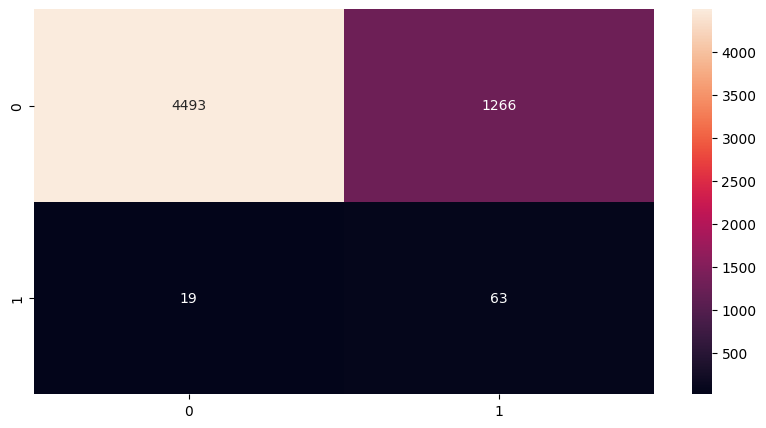

In [89]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, Y_pred_test), annot=True, fmt=".0f")

In [90]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87      5759
           1       0.05      0.77      0.09        82

    accuracy                           0.78      5841
   macro avg       0.52      0.77      0.48      5841
weighted avg       0.98      0.78      0.86      5841



In [ ]:
len(df_encoded)

38886

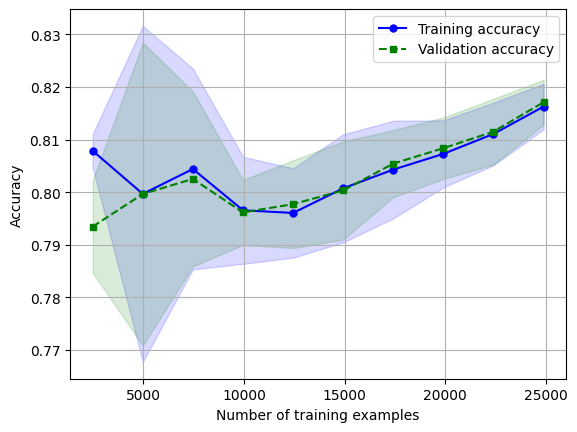

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define model and parameters
model = Pipeline ([
            ('scaler', scaler),
            ('balance', smote),
            ('clf', logreg)])
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_percentile, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Feature Importance
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)


In [ ]:
importances

,Attribute,Importance
3,agency_3,0.494120
5,product_name_1,0.475737
4,product_name_0,0.444052
6,product_name_2,0.394972
12,net_sales,0.198525
11,duration,0.019942
14,age,-0.073166
8,product_name_4,-0.074824
13,commision,-0.082207
9,agency_type_Travel Agency,-0.205405


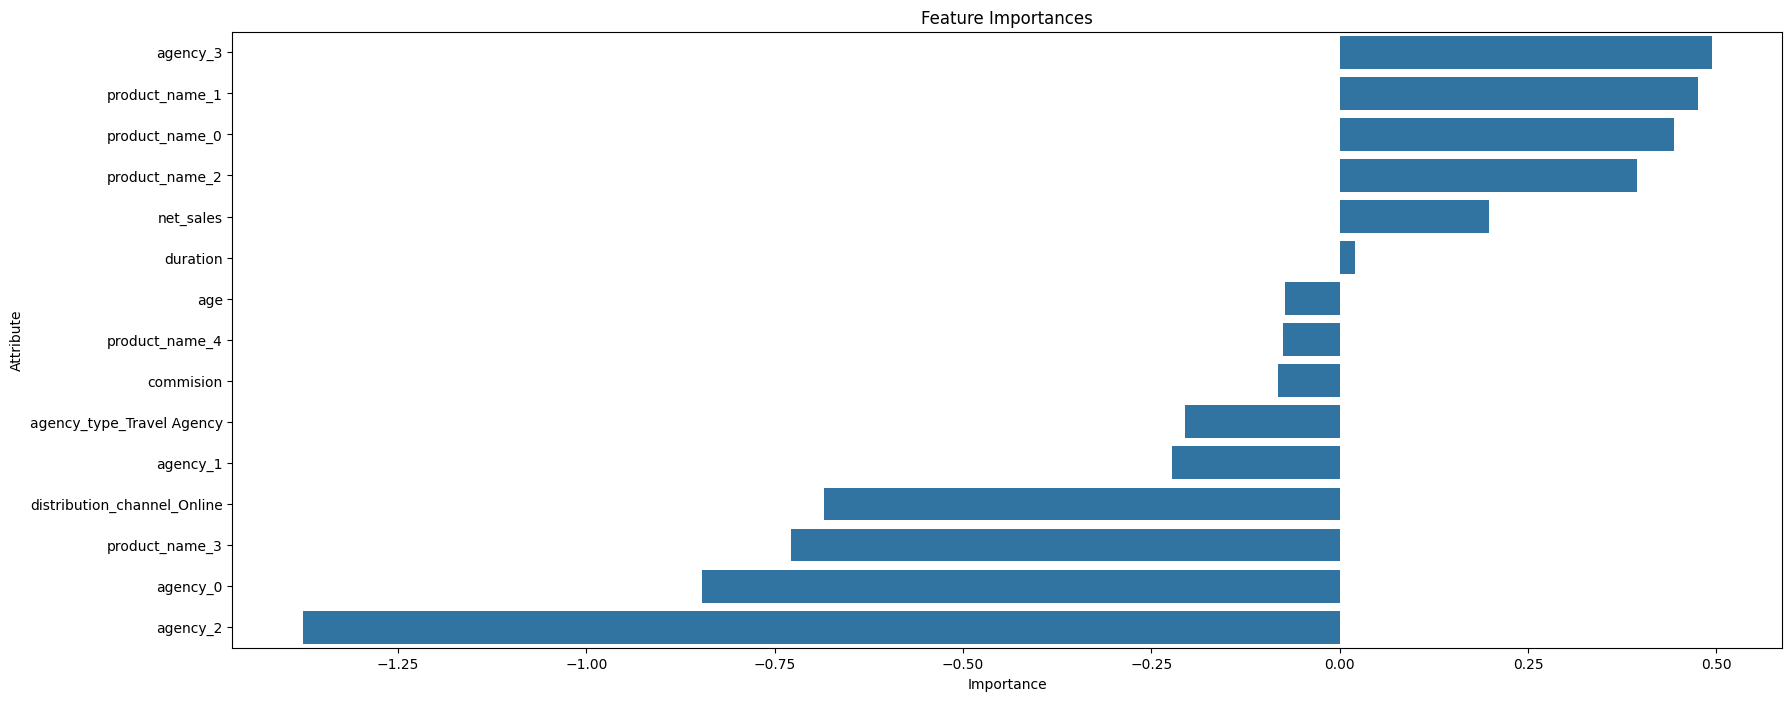

In [ ]:

# Plot the feature importances
plt.figure(figsize=(20, 8))
sns.barplot(x='Importance', y='Attribute', data=importances)
plt.title('Feature Importances')
plt.show()

Feature Importance menunjukkan bahwa beberapa fitur seperti agency_3, produk product_name_1, product_name_0, product_name_2, dan net_sales sangat penting untuk model, dengan agency_3 sebagai yang paling berpengaruh. Sementara itu, beberapa fitur seperti agency_0, agency_2,product_name_3, dan distribution_channel_online memiliki pengaruh negatif yang kuat Hal ini menunjukkan bahwa variabel target model paling dipengaruhi secara positif oleh agen dan produk tertentu, sementara dipengaruhi secara negatif oleh agen lain, produk tertentu, dan saluran distribusi online. 

## Analisis Bisnis dan Rekomendasi

## Save Model

In [ ]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('smote', SMOTE(random_state=2024)),
    ('logreg', LogisticRegression(
        C=0.01,
        max_iter=500,
        penalty='l2',
        solver='saga'
    ))
])
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['agency', 'product_name']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['agency_type',
                                                   'distribution_channel']),
                                                 ('rob', RobustScaler(),
                                                  ['duration', 'net_sales',
                                                   'commision', 'age'])])),
                ('smote', SMOTE(random_state=2024)),
                ('logreg',
                 LogisticRegression(C=0.01, max_iter=500, solver='saga'))])

In [ ]:
pickle.dump(final_pipeline, open('Erza_Anandhika_Capstone 3_Travel Insurance.sav', 'wb'))